In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#多子图
def muti_axes(mode):
    import matplotlib.pyplot as plt
    if mode == 0:
        plt = plt.figure(figsize=(12.8, 4.8), dpi=100) # 通过figsize调整fig大小 SODA 9/15
        ax1 = plt.subplots()
        ax1.spines["right"].set_color("none")
        # ax1.spines["left"].set_color("none")  # 保留x轴和y轴
        ax1.spines["top"].set_color("none")
        # ax1.spines["bottom"].set_color("none")
        return ax1
    elif mode != 0:
        # 不能加 plt = plt.figure()
        ax2 = plt.subplot(2,6,mode)
        ax2.spines["right"].set_color("none")
        # ax2.spines["left"].set_color("none")
        ax2.spines["top"].set_color("none")
        # ax2.spines["bottom"].set_color("none")
        return ax2


In [15]:
#获取x，y轴数据
def data_egy(target_df):
    row_labels = target_df.index[:]
    col_iteration_labels = target_df.columns[4]
    col_energy_labels = target_df.columns[8]
    x = target_df.loc[row_labels,col_iteration_labels].to_numpy()
    y = target_df.loc[row_labels,col_energy_labels].to_numpy()
    return x,y
def feature_egy(target_df):
    row_labels = target_df.index[:]
    col_feature_labels = target_df.columns[5]
    col_energy_labels = target_df.columns[8]
    x = target_df.loc[row_labels,col_feature_labels].to_numpy()
    y = target_df.loc[row_labels,col_energy_labels].to_numpy()
    return x,y

In [16]:
#画图
#这个地方需要改一下  SODA 9/15注
from cProfile import label


def plot_scatter(ax,x,y):
    
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    ax.scatter(x,y,s=0.5)

def plot_bar1(ax,x,y):
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    ax.text(x=8700,y=1,s="all bar no_datapoints=3900",fontsize =12,verticalalignment="top",horizontalalignment="right",color = "b",bbox = dict(facecolor = "gray", alpha = 0.6))
    ax.set_xlabel("no_features")
    ax.set_ylabel("train_energy(J)")
    ax.set_title("How no_features impact train_energy(J)")

def plot_bar2(ax,x,y):
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    ax.set_xlabel("no_datapoints")
    ax.set_ylabel("train_energy(J)")
    ax.set_title("How no_datapoints impact train_energy(J)")

def plot_bar3(ax,x1,x2,y1,y2):
    ax = muti_axes(ax)
    ax.set_ylim(0,1)
    p1 = ax.bar(x1,y1,100,label = "no_datapoints")
    p2 = ax.bar(x2,y2,100,label = "no_datapoints")
    # ax.bar_label(p1, label_type='edge',padding=10,labels="no_datapoints")
    # ax.bar_label(p2, label_type='edge',padding=10,labels="no_features")
    ax.set_xlabel("no_datapoints and no_features")
    ax.set_ylabel("train_energy(J)")


    

In [17]:
file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)

第二题

In [18]:

df1 = df[(df["algorithm"] == 'SVM')&(df["RQ"]==2.2) ]
row_labels = df1.index[:]
col_labels = df1.columns[[0,5,2,8]]
df2 = df1.loc[row_labels,col_labels]
df2.columns


Index(['algorithm', 'no_features', 'experiment_id', 'train_energy(J)'], dtype='object')

In [19]:
#用experiment_id分组，因为在RQ=2.2时，每个特征数对应一个experiment_id，每个实验进行30次，我们之后讲这30次实验的experiment_id（J）取平均
df3 = df2.groupby(by="experiment_id").mean()
df3

,no_features,train_energy(J)
experiment_id,,
11,817.0,0.230795
12,1633.0,0.361255
13,2451.0,0.392624
14,3268.0,0.427346
15,4084.0,0.463803
16,4901.0,0.763848
17,5718.0,0.527261
18,6535.0,0.509580
19,7352.0,0.624900


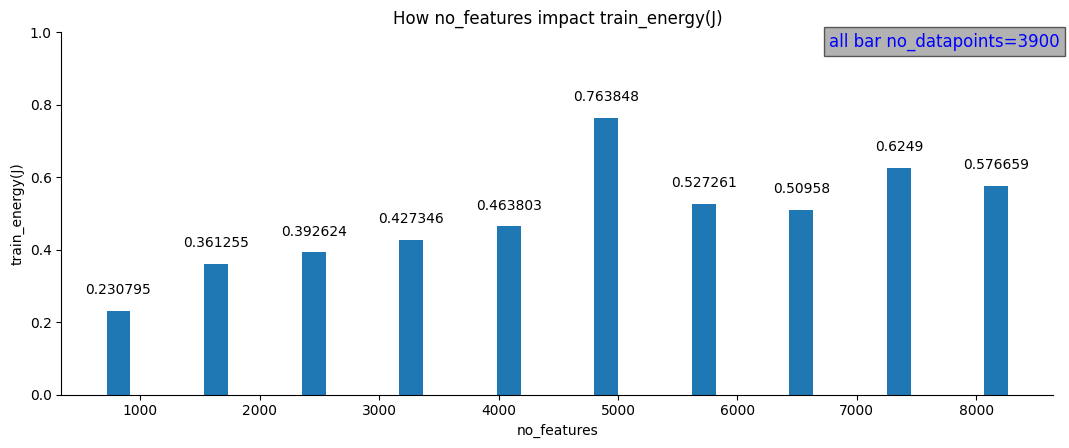

In [20]:
x = df3.loc[df3.index[:],df3.columns[0]].to_numpy()
y = df3.loc[df3.index[:],df3.columns[1]].to_numpy()
plot_bar1(0,x,y)

#no_datapoint 都为3900


探索
怎么画2因素图？

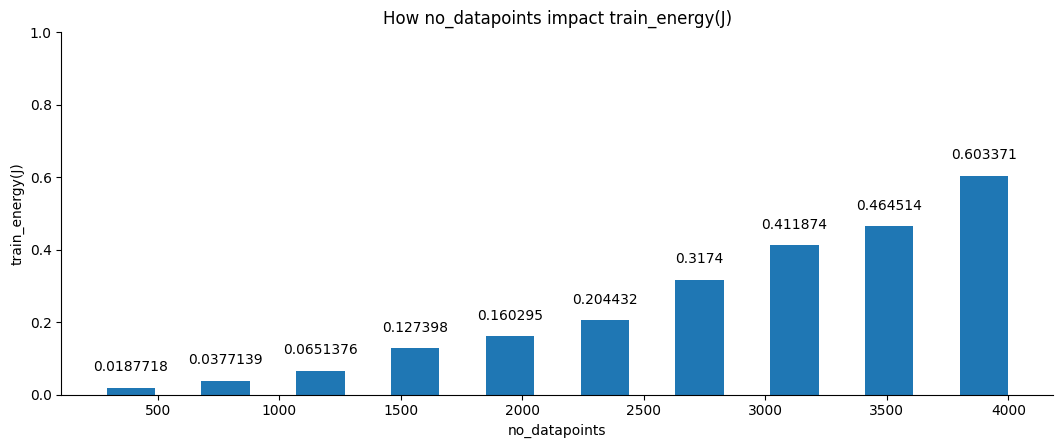

In [21]:

df4 = df[(df["algorithm"] == 'SVM')&(df["RQ"]==2.1) ]
row_labels = df4.index[:]
col_labels = df4.columns[[0,4,2,8]]
df5 = df4.loc[row_labels,col_labels]
df6 = df5.groupby(by="experiment_id").mean()
x = df6.loc[df6.index[:],df6.columns[0]].to_numpy()
y = df6.loc[df6.index[:],df6.columns[1]].to_numpy()
plot_bar2(0,x,y)

#no_features 都为8169


第三题

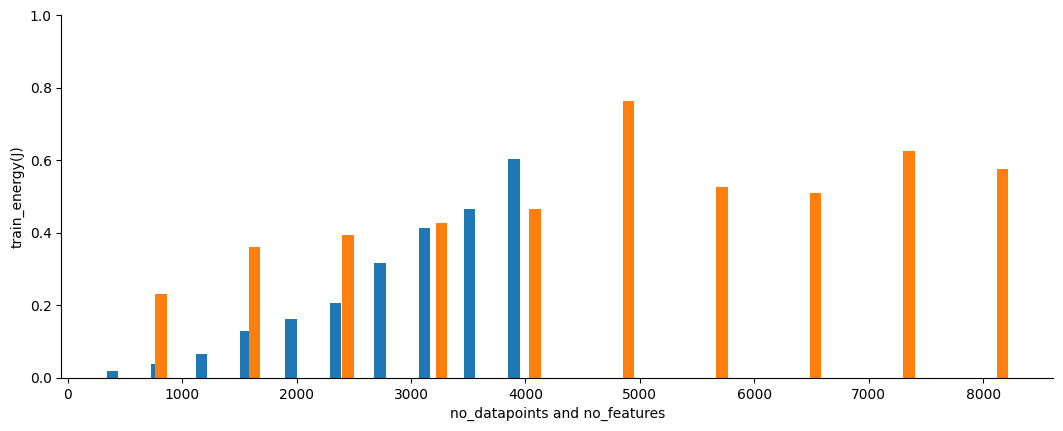

In [22]:
x1 = df6.loc[df6.index[:],df6.columns[0]].to_numpy()
x2 = df3.loc[df3.index[:],df3.columns[0]].to_numpy()
y1 = df6.loc[df6.index[:],df6.columns[1]].to_numpy()
y2 = df3.loc[df3.index[:],df3.columns[1]].to_numpy()
plot_bar3(0,x1,x2,y1,y2)

In [23]:

print(len(df["algorithm"].drop_duplicates()))
df["algorithm"].drop_duplicates()

6


0               AdaBoost
1          Decision Tree
2                    SVM
4     Bagging Classifier
6                    KNN
14         Random Forest
Name: algorithm, dtype: object

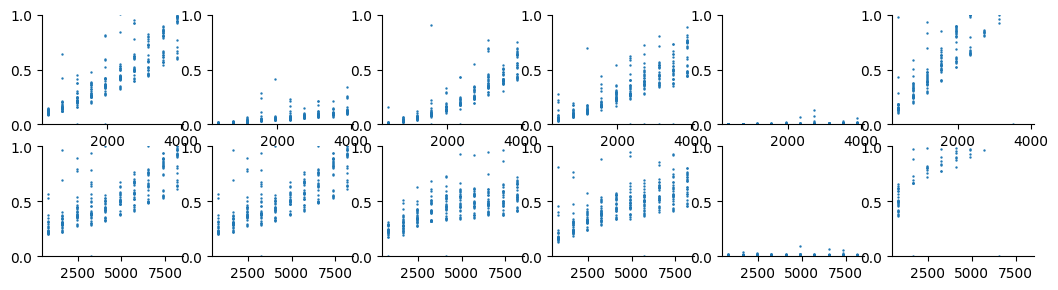

In [24]:
df_AdaBoost = df[df["algorithm"] == "AdaBoost"]
df_AdaBoost_datapoints = df_AdaBoost[df_AdaBoost["RQ"] == 2.1]
df_AdaBoost_features = df_AdaBoost[df_AdaBoost["RQ"] == 2.2]

df_DecisionTree = df[df["algorithm"] == "Decision Tree"]
df_DecisionTree_datapoints = df_DecisionTree[df_DecisionTree["RQ"] == 2.1]
df_DecisionTree_features = df_DecisionTree[df_DecisionTree["RQ"] == 2.2]

df_SVM = df[df["algorithm"] == "SVM"]
df_SVM_datapoints = df_SVM[df_SVM["RQ"] == 2.1]
df_SVM_features = df_SVM[df_SVM["RQ"] == 2.2]

df_BC = df[df["algorithm"] == "Bagging Classifier"]
df_BC_datapoints = df_BC[df_BC["RQ"] == 2.1]
df_BC_features = df_BC[df_BC["RQ"] == 2.2]

df_KNN = df[df["algorithm"] == "KNN"]
df_KNN_datapoints = df_KNN[df_KNN["RQ"] == 2.1]
df_KNN_features = df_KNN[df_KNN["RQ"] == 2.2]

df_RandomForest = df[df["algorithm"] == "Random Forest"]
df_RandomForest_datapoints = df_RandomForest[df_RandomForest["RQ"] == 2.1]
df_RandomForest_features = df_RandomForest[df_RandomForest["RQ"] == 2.2]





plt = plt.figure(figsize=(12.8, 3.2), dpi=100)
#AdaBoost
x,y = data_egy(df_AdaBoost_datapoints)
plot_scatter(1,x,y)
x,y = feature_egy(df_AdaBoost_features)
plot_scatter(7,x,y)
#Decision_Tree
x,y = data_egy(df_DecisionTree_datapoints)
plot_scatter(2,x,y)
x,y = feature_egy(df_AdaBoost_features)
plot_scatter(8,x,y)
#SVM
x,y = data_egy(df_SVM_datapoints)
plot_scatter(3,x,y)
x,y = feature_egy(df_SVM_features)
plot_scatter(9,x,y)

#Bagging Classifier
x,y = data_egy(df_BC_datapoints)
plot_scatter(4,x,y)
x,y = feature_egy(df_BC_features)
plot_scatter(10,x,y)
#KNN
x,y = data_egy(df_KNN_datapoints)
plot_scatter(5,x,y)
x,y = feature_egy(df_KNN_features)
plot_scatter(11,x,y)
#Random Forest 
x,y = data_egy(df_RandomForest_datapoints)
plot_scatter(6,x,y)
x,y = feature_egy(df_RandomForest_features)
plot_scatter(12,x,y)



In [25]:
df.index
df.columns

Index(['algorithm', 'RQ', 'experiment_id', 'iteration', 'no_datapoints',
       'no_features', 'preprocessing_energy(J)', 'preprocessing_time(s)',
       'train_energy(J)', 'train_time(s)', 'predict_energy(J)',
       'predict_time(s)', 'datatype', 'accuracy', 'precision', 'recall', 'f1'],
      dtype='object')

In [26]:
df[(df["algorithm"]=="SVM")&(df["RQ"]==2.2)]

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
10,SVM,2.2,20,24,3900,8169,0.000555,1.428892,0.412243,2.066957,0.313685,1.687010,float64,0.828349,0.431965,0.892857,0.582242
29,SVM,2.2,18,6,3900,6535,0.027213,1.464715,0.485354,2.002823,0.253381,1.696711,float64,0.828349,0.431965,0.892857,0.582242
50,SVM,2.2,14,5,3900,3268,0.017794,1.460684,0.319910,1.917792,0.193521,1.663233,float64,0.828349,0.431965,0.892857,0.582242
63,SVM,2.2,11,25,3900,817,0.015382,1.445168,0.292157,1.678948,0.109493,1.578061,float64,0.828349,0.431965,0.892857,0.582242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,SVM,2.2,20,16,3900,8169,0.000603,1.468778,0.413254,2.061135,0.235127,1.717008,float64,0.828349,0.431965,0.892857,0.582242
3565,SVM,2.2,12,29,3900,1633,0.018434,1.444016,0.513829,1.743940,0.284794,1.578154,float64,0.828349,0.431965,0.892857,0.582242
3577,SVM,2.2,12,12,3900,1633,0.018543,1.455903,0.275112,1.752773,0.207455,1.602667,float64,0.828349,0.431965,0.892857,0.582242
3585,SVM,2.2,17,3,3900,5718,0.020292,1.455735,0.371999,2.000642,0.177845,1.684551,float64,0.828349,0.431965,0.892857,0.582242
